# 06 - Séries Temporais

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- Revisão Séries Temporais
- Series Estacionarias e Não Estacionárias
- Transformações de Séries
- Teste de Dickey Fuller

<img src="https://miro.medium.com/max/364/1*46jxiV9PiL5omTI9FDoW3Q.png" width=600>

##   

## Séries Temporais

Para essa aula, vamos Começar a conhecer os conceitos de Séries Temporais!
<br><br>
__Séries temporais__ nada mais é do que um conjunto de dados que foram gravados __sequencialmente__ ao longo de um __período de tempo.__

In [1]:
# Imports Defaults 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [2]:
covid = pd.read_csv('covid_saopaulo.csv', index_col=0, parse_dates=True)

In [3]:
covid.head()

,confirmed,deaths
date,,
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,1,0
2020-02-29,0,0
2020-03-01,0,0


In [4]:
covid.index = covid.index.to_period("D")

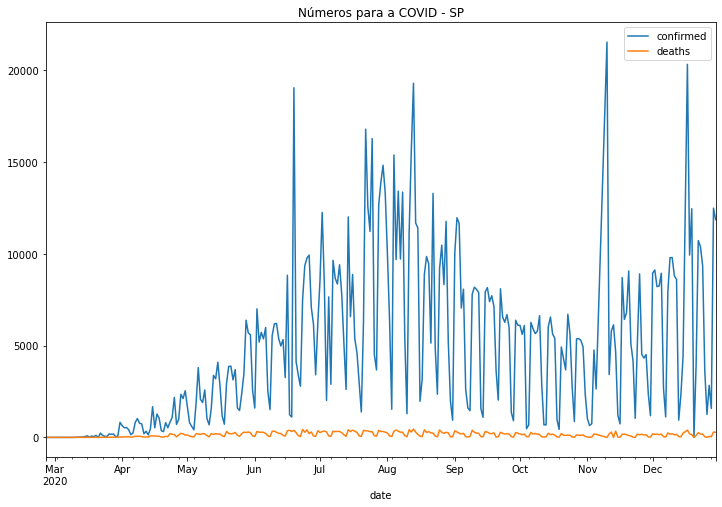

In [6]:
# Plot da curva de confirmados e mortes por covid
covid.plot(figsize = (12, 8))

# Titulo do Gráfico
plt.title("Números para a COVID - SP")

# Mostra o gráfico
plt.show()

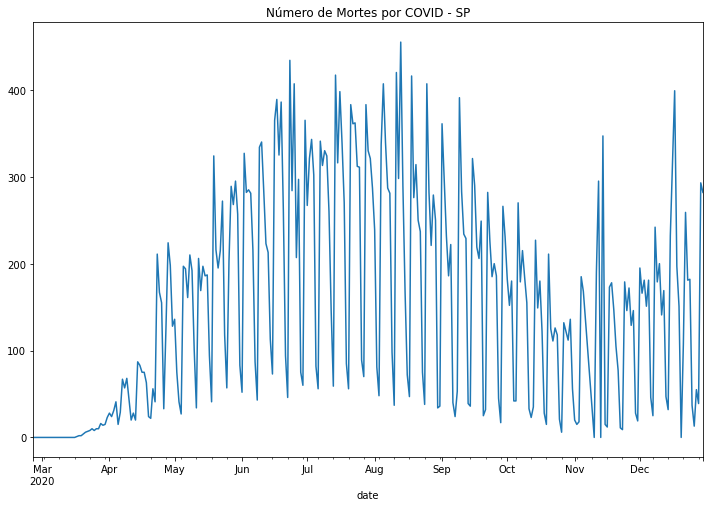

In [7]:
# plot do gráfico
covid['deaths'].plot(figsize = (12, 8))

# Mostra o titulo
plt.title('Número de Mortes por COVID - SP')

# Mostra o gráfico
plt.show()

##   

## Componentes da Série Temporal

Uma série temporal pode ser decomposta nos seguintes **componentes**:

- **Tendência (T)**: indica o seu comportamento ao longo do tempo, ou seja, se é **crescente**, **decrescente** ou **estável**. Além disso, a tendência indica também a velocidade destas mudanças. 
<br>
- **Ciclos (C)**: são  **oscilações de subida e de queda nas séries**, de forma **suave e repetida**, ao longo da componente de tendência. Os movimentos cíclicos tendem a ser irregulares.
<br>
- **Sazonalidade (S)**: são **oscilações de subida e de queda que sempre ocorrem em um determinado período do ano, do mês, da semana ou do dia**. Estes movimentos são facilmente previsíveis, ocorrendo em **intervalos regulares de tempo**. 
<br>
- **Ruído Aleatório ($\epsilon$)**: ou erro no período **t** são variações irregulares ou flutuações inexplicáveis, resultado de fatos fortuitos e inesperados.

Algumas ilustrações:

<img src="https://www.datavedas.com/wp-content/uploads/2018/04/3.1.3.1-Introduction-to-Time-Series-Data-R.jpg" width=600>

<img src="https://i2.wp.com/itfeature.com/wp-content/uploads/2014/06/Component-of-Time-Series-Data.jpg?resize=661%2C599" width=600>


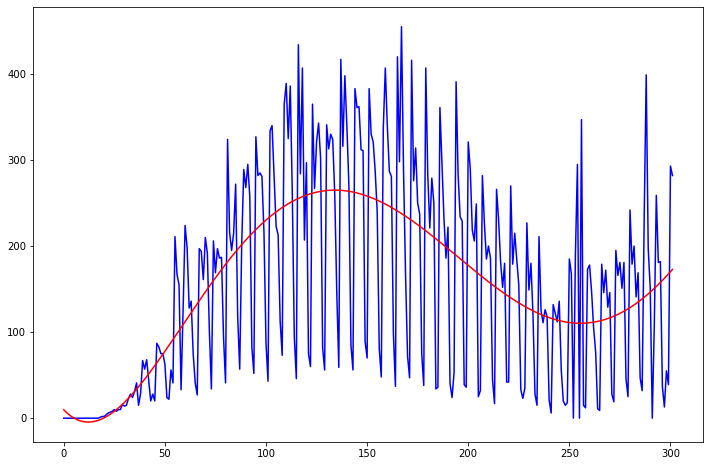

In [25]:
# Aqui não trabalharemos com as datas mas sim com um índice inteiro das observações
x = np.array(range(len(covid.index)))

# Utilizando apenas os casos de morte por COVID
y = np.array(covid['deaths'])

# Define um polinomio de 5 ordem de acordo com x e y
polynomial = np.polyfit(x, y, 5)

# Gera a curva do polinomio
p5 = np.poly1d(polynomial)

# Cria os pontos continuos para o X
xx = np.linspace(x.min(), x.max(), len(y))

# Dimensões do Gráfico
plt.rcParams['figure.figsize'] = [12, 8]

# Plot das Curvas
plt.plot(x,y,label="Real data",color="blue") # Plota os dados
plt.plot(xx,p5(xx),label="Polinomio",color="red") # Polinômio

# Mostra o Gráfico
plt.show()

## 

Já para a sazonalidade, pode-se classificar uma série temporal em **aditiva ou multiplicativa**:

- A **série é aditiva** se a magnitude da **sazonalidade mantem-se constante** ao longo do prazo; 
- A série é denominada **multiplicativa** se ao longo do tempo a **amplitude da sazonalidade aumenta**

<img src="https://miro.medium.com/max/564/1*LdeXlKrgNkFUjOhnO4Zzaw.jpeg" width=600>

Vamos aos exemplos:

> **Exemplo**: Esta série é referente à quantidade de passageiros na Airline. Note que a tendência também é crescente e sazonal. Com o decorrer do tempo a quantidade de passageiros que viajam pela companhia aérea aumenta (eixo y), porém a periodicidade da sazonalidade continua marcada no gráfico. Trata-se de uma série com sazonalidade multiplicativa. Neste caso, a quantidade de passageiros a cada período sazonal aumenta.

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/9a0420ad-f498-4d2e-9a2b-28a224ccbdf5.png" width=600>

> **Exemplo**: No exemplo abaixo é representado a média da temperatuda diária em uma determinada cidade ao longo de 1 ano. Note que a série é estável (não possui tendência crescente tampouco decrescente), é sazonal aditiva (possui periodicidade bem marcada e sem grande variação na amplitude).

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/ec935a3f-daf0-4fff-a99f-5bc3c2a906d3.png" width=600>


Para observarmos as componentes acima, podemos utilizar a biblioteca [statsmodels](https://www.statsmodels.org/stable/index.html), que é muito utilizada para a construção de modelos estatísticos.

A função `seasonal_decompose` proporciona a decomposição de séries temporais de forma simples e rápida!

In [27]:
# Import da funçaõ da seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

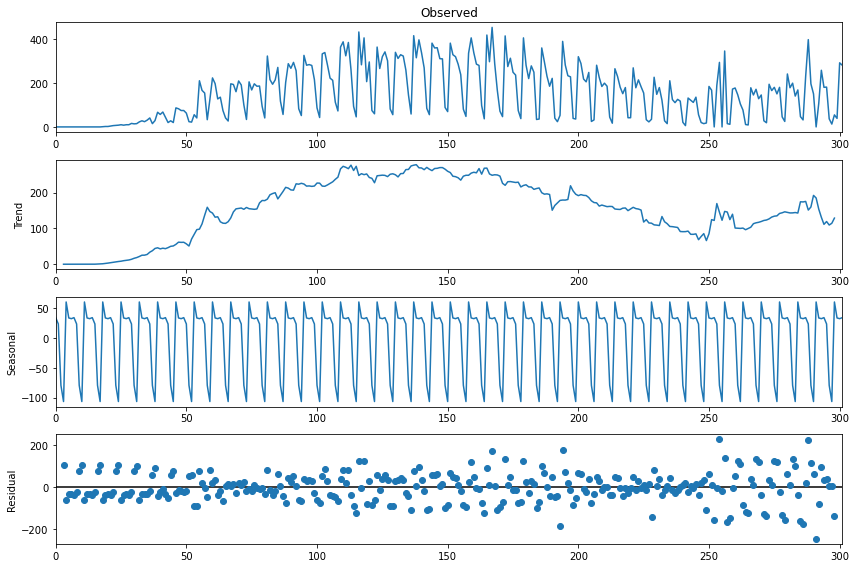

In [29]:
# Utilizando só os casos de morte
mortes = np.array(y)

# Decomposição - Aditiva
result_add = seasonal_decompose(mortes, model='additive', period=7)

# Plot da decomposição
result_add.plot()

# Mostrar o Gráfico
plt.show()

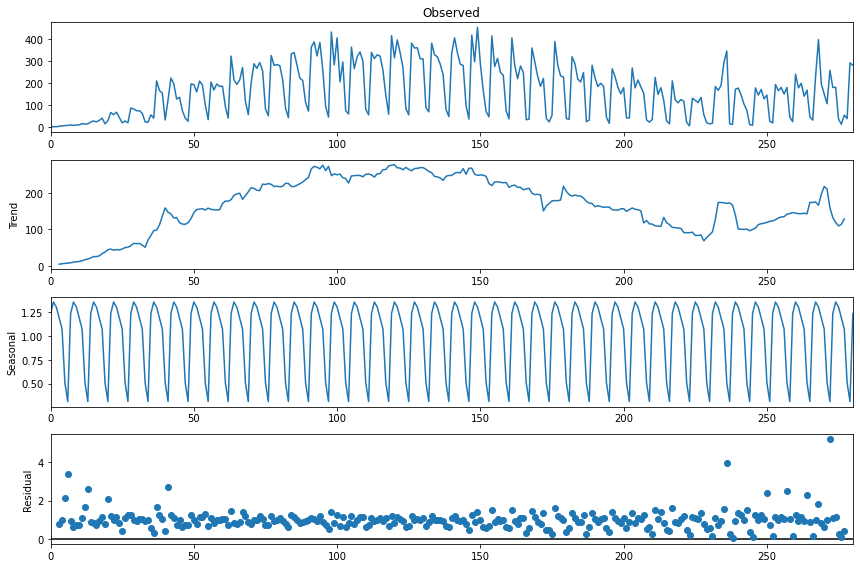

In [32]:
# PAra a decomposição em multiplicativa, precisa desconsiderar os valores < 0 ou nulos
mortes_pos = mortes[mortes>0]

# Decomposição multiplicativa
result_mul = seasonal_decompose(mortes_pos, model='multiplicative', period=7)

# Plot da Decomposição
result_mul.plot()

# Plot do Gráfico
plt.show()

##  

## Séries Estacionárias e Não Estacionárias

Antes de falarmos sobre _Forecasting_ ou predição de séries temporais, um requisito essencial é que a série temporal seja __estacionária__. Vamos entender com o gráfico a seguir:

<img src="https://cdn-images-1.medium.com/max/1600/1*U2m5Eq7ScLnf2kG5mnQsKQ.png" width=800>

A diferença entre uma série temporal __estacionária__ e __não estacionária__ é que para as séries estacionárias, o valor de __média__ e __variância__ da série é __constante__ ao longo do tempo, diferente do caso das 'series não estacionárias.<br><br>

<img src="https://miro.medium.com/max/2580/1*tkx0_wwQ2JT7pSlTeg4yzg.png" width=800>
<br>

Uma forma para sabermos de fato se a nossa série temporal condiz com a condição de ser estacionária, utilizaremos um teste de hipótese chamado de __Teste de Dickey-Fuller Aumentado__.

In [8]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [9]:
# Testando para os casos confirmados
y_conf = covid['confirmed'].values


# Teste de Dickey Fuller
result = adfuller(y_conf)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] < 0.05:
    print('É Estacionário!')
else:
    print('Não é Estacionário!')

ADF Statistic: -1.528543
p-value: 0.519347
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572
Não é Estacionário!


In [10]:
# Testando para os casos de mortes
y_mortes = covid['deaths'].values

# Aplicando o Teste
result = adfuller(y_mortes)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] < 0.05:
    print('É Estacionário!')
else:
    print('Não é Estacionário!')

ADF Statistic: -2.017376
p-value: 0.279007
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572
Não é Estacionário!


##   

## Transformação de Séries

Dado que a Série Temporal pode __não ser estacionária__, podemos aplicar algumas transformações que possa auxiliar na manipulação dos nosso dados e assim deixar a série o mais próxima de ser estacionária.<br><br>

[Neste Link](https://people.duke.edu/~rnau/411home.htm) da Duke University, têm-se um guia bem detalhado para os diversos passo a passo em todo o processo de _Time Series Forecasting_, inclusive sobre os tipos de transformações que podem ser feitas:

- Calcular o __log__ de todas as observações:

In [11]:
y = np.log(y_mortes[y_mortes>0])

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')

ADF Statistic: -3.629130
p-value: 0.005228
Critical Values:
	1%: -3.455
	5%: -2.873
	10%: -2.573
É Estacionário


- Calcular a __raíz quadrada__ de todas as observações:

In [12]:
y = np.sqrt(y_mortes[y_mortes>0])

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')

ADF Statistic: -3.445985
p-value: 0.009488
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573
É Estacionário


- Calcular a __raíz cúbica__ de todas as observações:

In [13]:
y = np.cbrt(y_mortes[y_mortes>0])

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')

ADF Statistic: -3.953411
p-value: 0.001675
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573
É Estacionário


- Calculando as __diferenças__ entre as observações:

In [18]:
y = np.diff(y_mortes)

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')

ADF Statistic: -8.026969
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572
É Estacionário


##   

## Métricas Móveis

Podemos calcular algumas métricas em relação a uma janela de tempo em dias, meses e etc, de acordo com o período de tempo definido para a base de dados. Vamos calcular as métricas móveis utilizando a função `rolling`:

In [19]:
# Verificando as séries de média e desvio-padrão móvel com janela de 15 dias

covid['Média Movel - 15 dias'] = covid['deaths'].rolling(window=15).mean()
covid['Desvio Paadrão Móvel - 15 dias'] = covid['deaths'].rolling(window=15).std()
covid['Mediana Móvel - 15 dias'] = covid['deaths'].rolling(window=15).median()

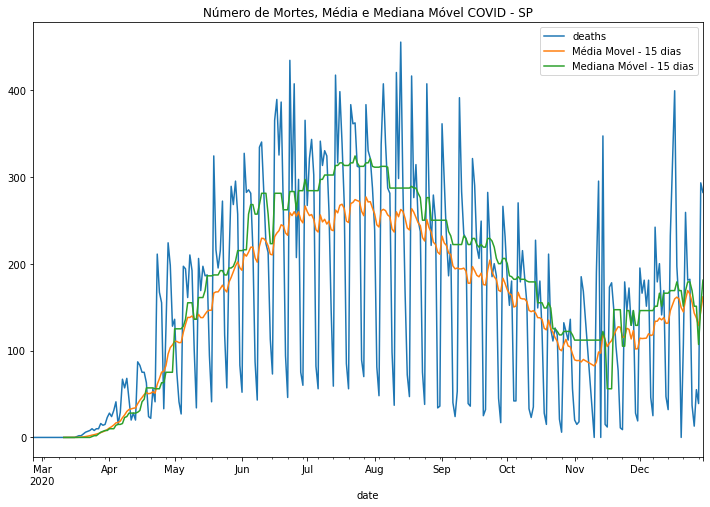

In [21]:
# Dimensões do Gráfico
plt.rcParams['figure.figsize'] = [12, 8]

# plot do gráfico
covid[['deaths', 'Média Movel - 15 dias', 'Mediana Móvel - 15 dias']].plot()

# Mostra o titulo
plt.title('Número de Mortes, Média e Mediana Móvel COVID - SP')

# Mostra o gráfico
plt.show()

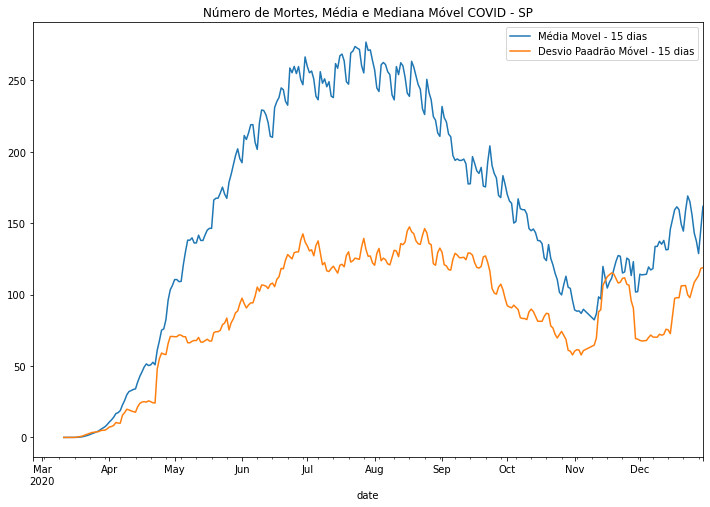

In [22]:
# Dimensões do Gráfico
plt.rcParams['figure.figsize'] = [12, 8]

# plot do gráfico
covid[['Média Movel - 15 dias', 'Desvio Paadrão Móvel - 15 dias']].plot()

# Mostra o titulo
plt.title('Média e Desvio Padrão Móvel COVID - SP')

# Mostra o gráfico
plt.show()

## 

## Exercícios

__1)__ Utilizando o _dataset_ `covid_saopaulo.csv`, plote o gráfico do número de casos de COVID em SP e a média móvel dos últimos 15 dias.

__2)__ Ainda utilizando o _dataset_ `covid_saopaulo.csv`, agora para os casos de óbitos por COVID em SP, define as componentes da série temporal (sazonalidade, tendência, resíduo).

__3)__ Plote o gráfico da série temporal e defina as componentes para o _dataset_ `airline_passengers.csv`, dado que para o caso deste _dataset_ temos como período mensal e sazonalidade multiplicativa.

__4)__ Ao estudar séries temporais, um fator importante para utilizar modelos preditivos é a questão de estacionaridade de uma série.

Para uma série ser estacionária, ela precisa que sua média e variância mantenham-se constante ao longo do tempo. Para o _dataset_ `airline_passengers.csv` não é estacionária devido a sua característica de sazonalidade multiplicativa (ou seja, ao longo do tempo aumenta a amplitude da série, dessa forma a variância não é constante).

Uma forma de suavizar a série temporal para que tenha um comportamento estacionário é pegarmos a diferença de variação entre os pontos. Assim vamos praticar da seguinte forma:

__A)__ Calcule a primeira diferença para os dados do _dataset_ `airlines.csv` e plote um gráfico. Podemos dizer que pode ter um comportamento estacionário?

__B)__ Faça o mesmo procedimento para a segunda diferença.

__5)__ Plote o gráfico do fechamento das ações do _Starbucks_ disponível no _dataset_ `starbucks.csv` e um gráfico de taxa de retorno das ações.

##   